In [1]:
import numpy as np 
import pandas as pd 

from datetime import datetime
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
temp = pd.read_csv('temp.csv', parse_dates=['noted_date'])
temp.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,2018-08-12 09:30:00,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-08-12 09:30:00,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,2018-08-12 09:29:00,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-08-12 09:29:00,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-08-12 09:29:00,31,In


In [3]:
temp['room_id/id'].value_counts()
cols_drop = ['id', 'room_id/id']
temp = temp.drop(cols_drop, axis=1)


In [4]:
temp['measure_hour'] = temp.noted_date.apply(lambda x:datetime.strftime(x,'%Y-%m-%d %H:00:00'))

In [5]:
temp_data = temp.groupby(['measure_hour','out/in']).temp.mean().reset_index()
temp_data = temp_data.pivot(index = 'measure_hour',columns = 'out/in', values = 'temp').reset_index().dropna()
temp_data.head()

out/in,measure_hour,In,Out
0,2018-01-11 00:00:00,32.000000,40.071429
2,2018-01-11 02:00:00,31.750000,38.428571
3,2018-01-11 03:00:00,30.444444,40.666667
4,2018-01-11 04:00:00,30.000000,42.200000
5,2018-01-11 05:00:00,30.000000,43.875000


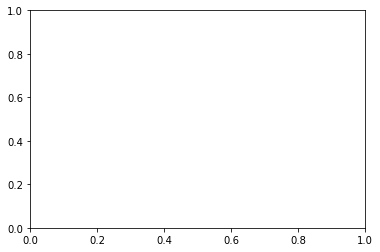

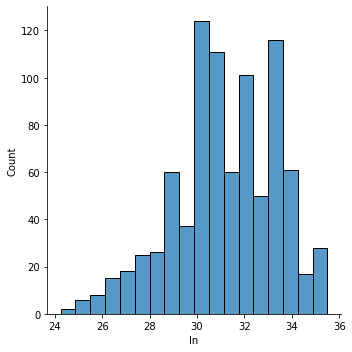

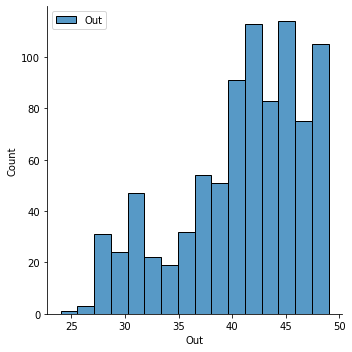

In [6]:
##VISUALIZATION
fig, ax = plt.subplots(figsize = (6,4))
g = sns.displot(temp_data.In, label = 'In')
g = sns.displot(temp_data.Out, label = 'Out')
plt.legend()


<AxesSubplot:xlabel='Out', ylabel='In'>

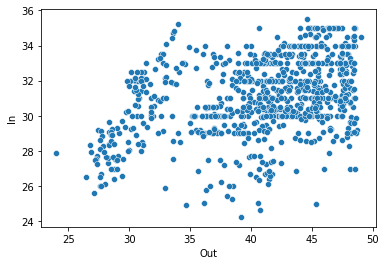

In [7]:
sns.scatterplot(x =temp_data.Out, y = temp_data.In)

<AxesSubplot:xlabel='Out', ylabel='In'>

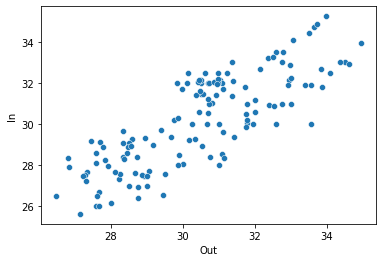

In [8]:
linear = temp_data[(pd.notna(temp_data.Out))&(pd.notna(temp_data.In)) & (temp_data.Out<35)]
linear = linear.drop(index = linear[((linear.Out>32)&(linear.In<30)|(linear.Out<25))].index, axis = 0)
sns.scatterplot(x = linear.Out, y = linear.In)

0.8934565680813321 3.0031835176757724


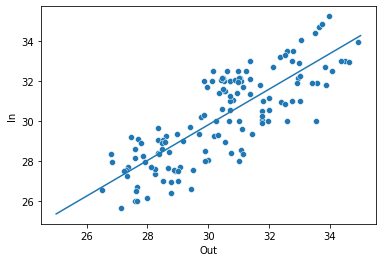

In [9]:
#Linear regression building
model = LinearRegression()
model.fit(linear[['Out']],linear.In)
l,k = model.coef_[0],model.intercept_
print(l,k)
sns.scatterplot(x = linear.Out, y = linear.In)
reg_line = np.linspace(25,35,100)
plt.plot(reg_line, reg_line*l + k)